# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

## Exploring Datasets with pandas and Matplotlib

## Downloading and Prepping Data

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df_can.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis =1, inplace= True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace = True)

In [ ]:
df_can.columns = list(map(str,df_can.columns))

In [ ]:
df_can = df_can.set_index('Country')

In [ ]:
df_can['Total'] = df_can.sum(axis = 1)

<ipython-input-8-327e637cc9af>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [ ]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
years = list(map(str,range(1980,2014)))

# Visualizing Data using Matplotlib

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


### Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [ ]:
df_continent = df_can.groupby('Continent',axis = 0).sum()


<ipython-input-12-93f024614509>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continent = df_can.groupby('Continent',axis = 0).sum()


In [ ]:
df_continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


<Axes: ylabel='Total'>

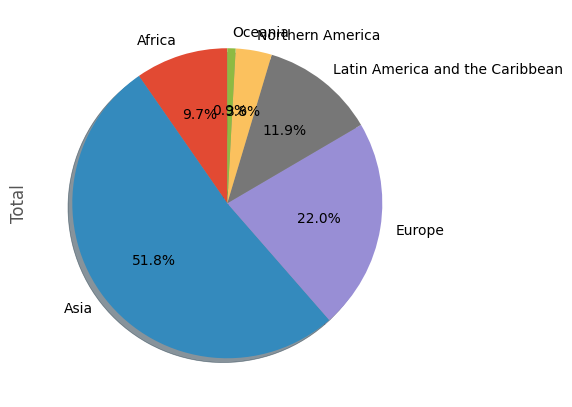

In [ ]:
df_continent['Total'].plot(kind = 'pie', figsize = (5,6), autopct='%1.1f%%', startangle = 90,shadow = True)

Text(0.5, 1.2, 'Immigrant to Canada by Continent [1980 - 2013]')

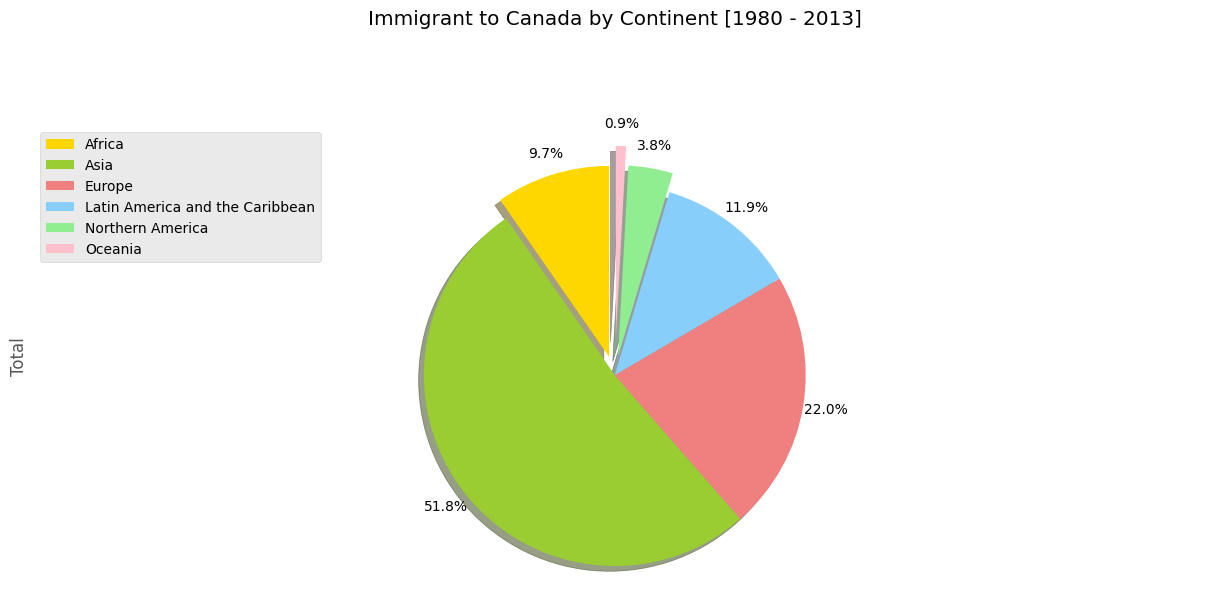

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]
df_continent['Total'].plot(kind = 'pie',figsize = (15,6), autopct = '%1.1f%%',startangle = 90, shadow = True,labels = None,
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,  # add custom colors
                            explode=explode_list
)

plt.axis('equal')
plt.legend(labels= df_continent.index,loc = 'upper left')
plt.title('Immigrant to Canada by Continent [1980 - 2013]', y = 1.2)

### Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013

Text(0.5, 1.2, 'Immigrant to Canada by Continent in 2013')

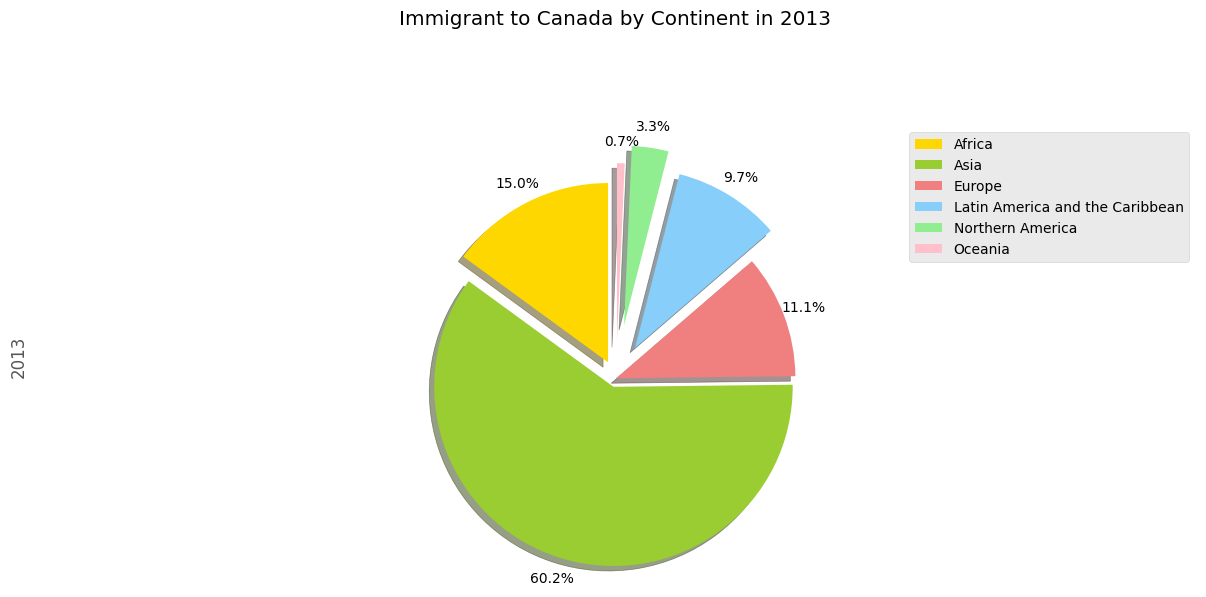

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.05, 0,0.2, 0.3, 0.2]

df_continent['2013'].plot(kind = 'pie',figsize = (15,6), labels = None, shadow = True,startangle = 90,autopct = '%1.1f%%',
                          pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,  # add custom colors
                            explode=explode_list
                          )
plt.axis('equal')
plt.legend(labels = df_continent.index)
plt.title('Immigrant to Canada by Continent in 2013',y =1.2)

## Box Plots

### Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

In [ ]:
df_japan = df_can.loc[['Japan'],years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Text(0, 0.5, 'Numbers of immigrants')

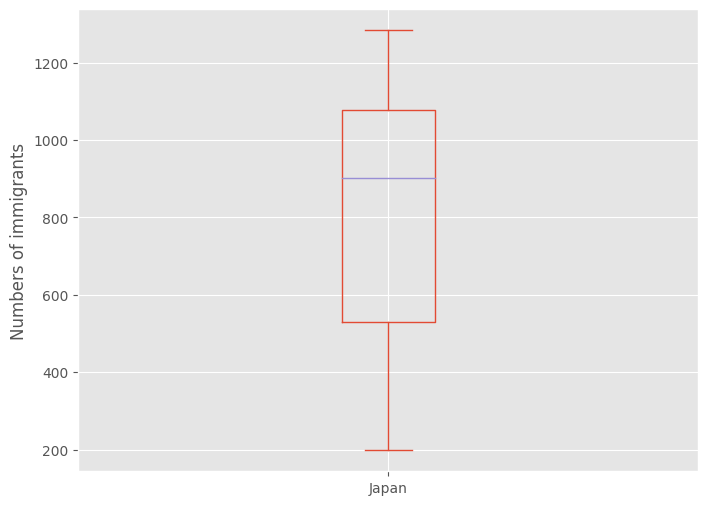

In [ ]:
df_japan.plot(kind = 'box',figsize = (8,6))
plt.ylabel('Numbers of immigrants')

In [ ]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


### Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe df_CI.

In [ ]:
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


Let's view the percentages associated with both countries using the describe() method

In [ ]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Step 2: Plot data.

Text(0, 0.5, 'Numbers of immigrants')

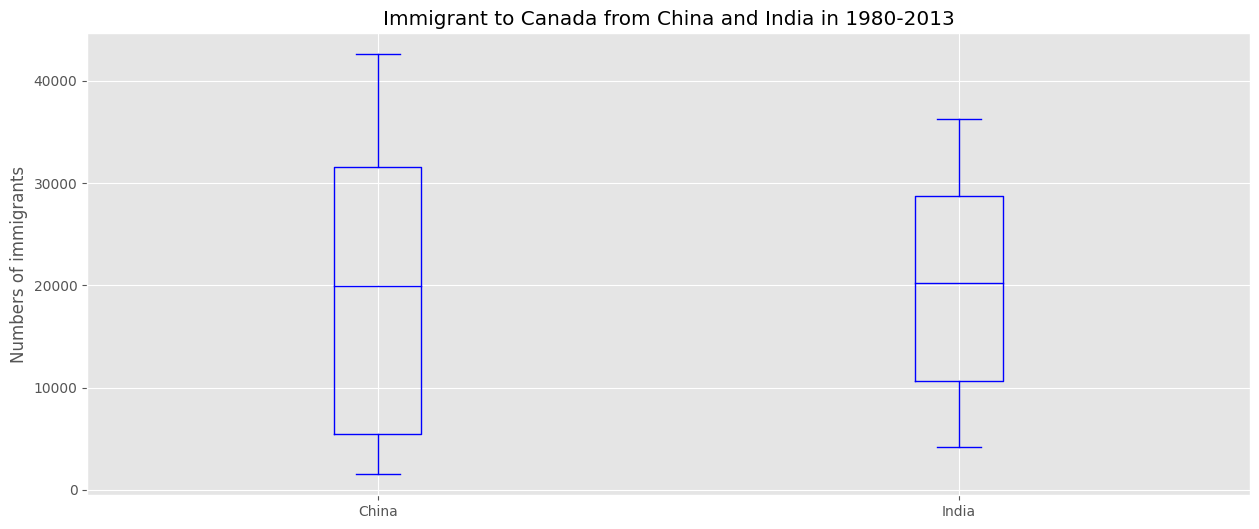

In [ ]:
df_CI.plot(kind = 'box',figsize = (15,6), color = 'blue')
plt.title("Immigrant to Canada from China and India in 1980-2013")
plt.ylabel("Numbers of immigrants")

### Subplots

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

We can then specify which subplot to place each plot by passing in the ax paramemter in plot() method as follows:

Text(0, 0.5, 'number of immigrants')

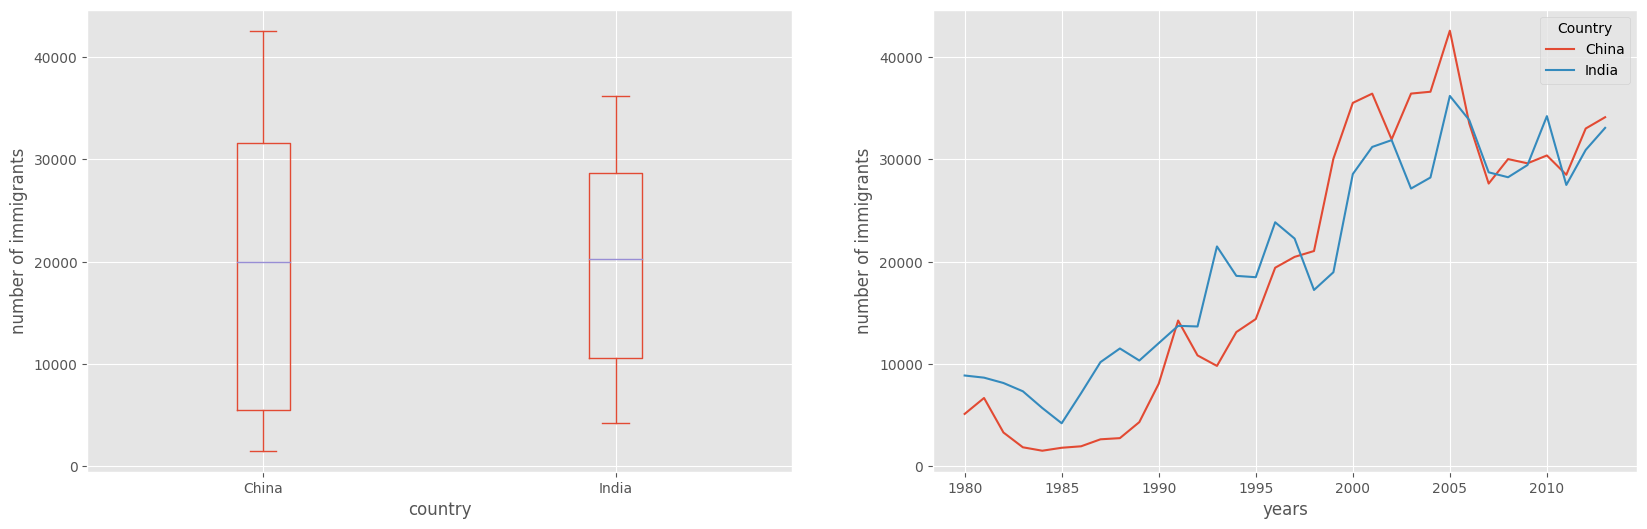

In [ ]:
fig = plt.figure() # create a figure

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_CI.plot(kind = 'box',figsize =(20,6),vert = True,ax = ax0)
ax0.set_ylabel('number of immigrants')
ax0.set_xlabel('country')

df_CI.plot(kind = 'line',figsize = (20,6),ax = ax1)
ax1.set_xlabel('years')
ax1.set_ylabel('number of immigrants')


### Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [ ]:
years2 = list(map(str,range(1980,2011)))

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

In [ ]:
df_top15 = df_can.sort_values('Total',ascending = False,axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [ ]:
year80s = list(map(str,range(1980,1990)))
year90s = list(map(str,range(1990,2000)))
year00s = list(map(str,range(2000,2010)))

df_80s = df_top15.loc[:,year80s].sum(axis = 1)
df_90s = df_top15.loc[:,year90s].sum(axis = 1)
df_00s = df_top15.loc[:,year00s].sum(axis =1)

new_df = pd.DataFrame({'1980s' : df_80s,'1990s':df_90s,'2000s':df_00s})
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


Text(0, 0.5, 'number of immigrants')

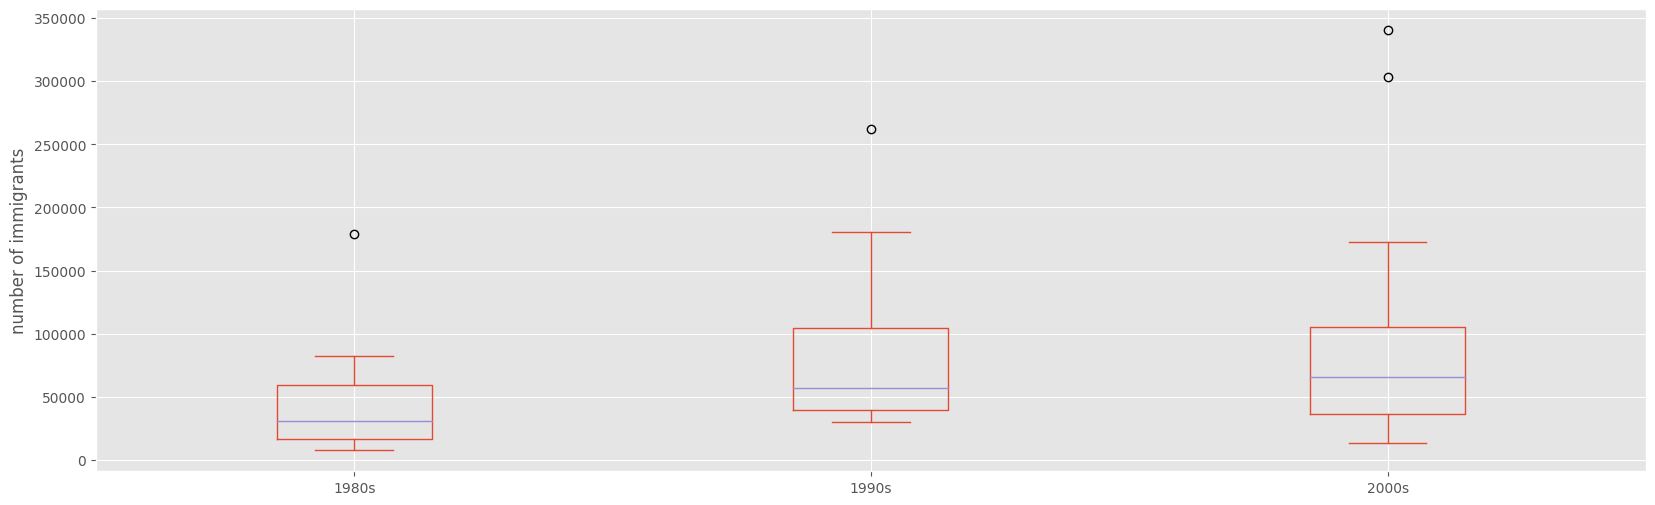

In [ ]:
new_df.plot(kind = 'box',figsize = (20,6),vert = True)

plt.ylabel('number of immigrants')

## Scatter Plots

let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

In [ ]:
df_tot = pd.DataFrame(df_can[years].sum(axis = 0))

In [ ]:
df_tot.reset_index(inplace = True)
df_tot.index = map(int,df_tot.index)

In [ ]:
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In Matplotlib, we can create a scatter plot set by passing in kind='scatter' as plot argument. We will also need to pass in x and y keywords to specify the columns that go on the x- and the y-axis.

<Axes: xlabel='year', ylabel='total'>

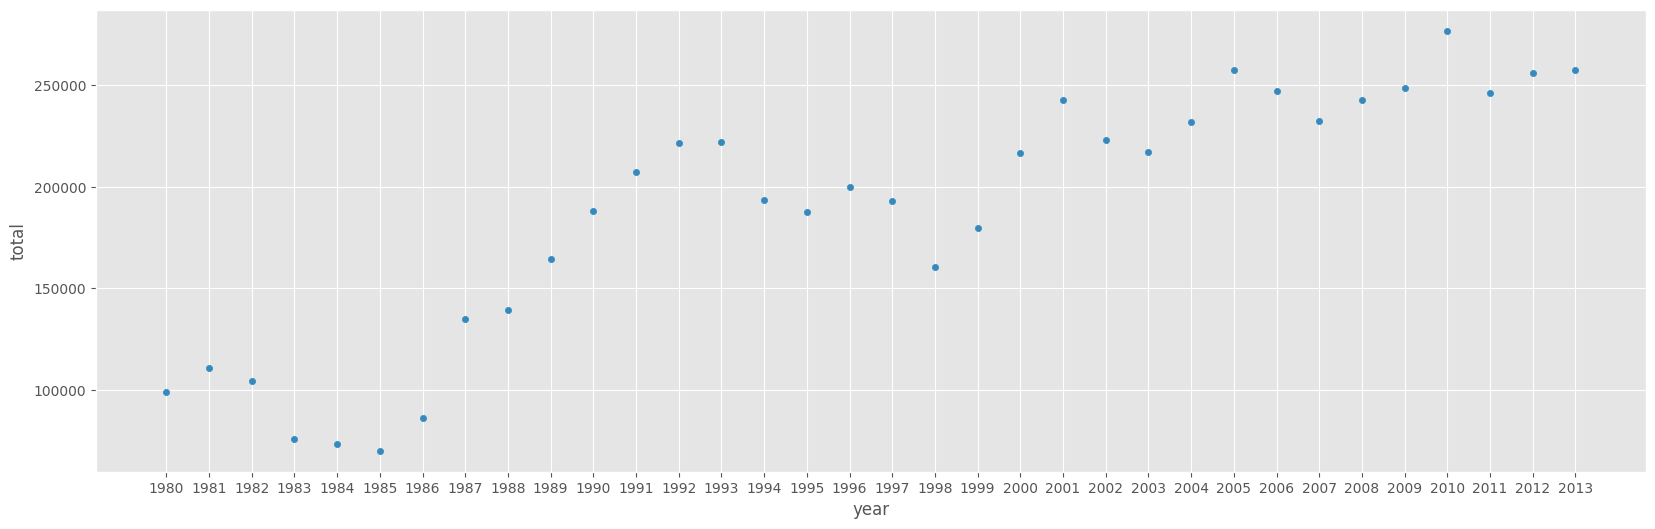

In [ ]:
df_tot.plot(kind = 'scatter',figsize =(20,6),x = 'year', y = 'total')

So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

####x: x-coordinates of the data.
####y: y-coordinates of the data.
####deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [ ]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x,y,deg =1)

fit

TypeError: ignored

## Bubble Plots

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In maplotlib, we can pass in an array or scalar to the keyword s to plot(), that contains the weight of each point.

Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013



In [ ]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Step 2: Create the normalized weights.

In [ ]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min())/(df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

In [ ]:
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min())/(df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

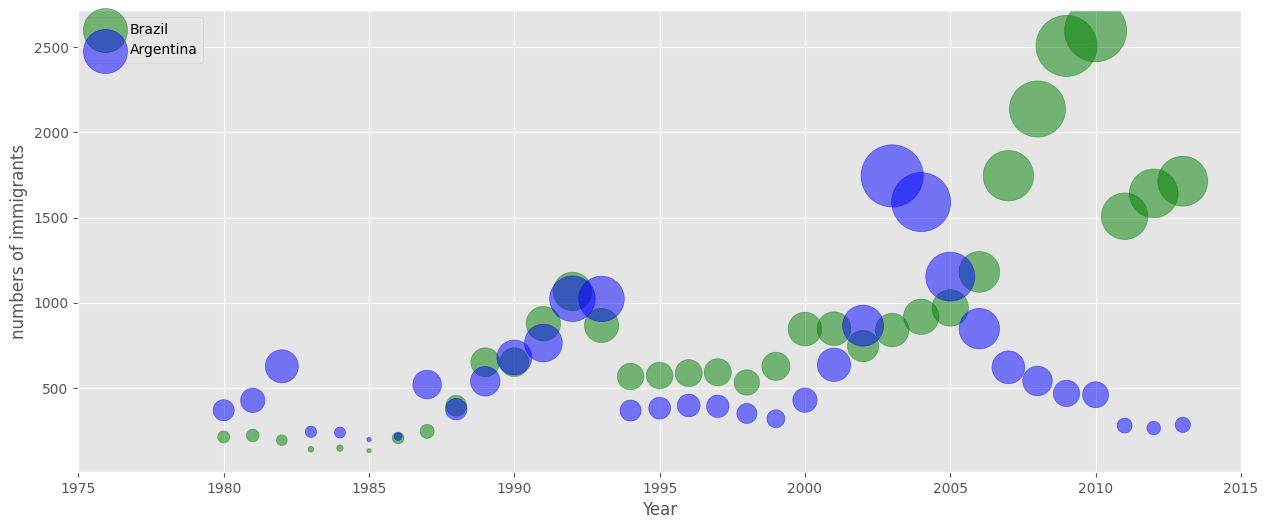

In [ ]:
ax0 = df_can_t.plot(kind = 'scatter',x = 'Year', y = 'Brazil',
                    alpha = 0.5,
                    figsize = (15,6),
                    color = 'green',
                    s = norm_brazil *2000 + 10,
                    xlim = (1975,2015)
                    )

ax1 = df_can_t.plot(kind = 'scatter',x= 'Year',y ='Argentina',
                    alpha = 0.5,
                    figsize = (15,6),
                    color = 'blue',
                    s = norm_argentina * 2000 +10,
                    ax = ax0

                    )
ax0.set_ylabel('numbers of immigrants')
ax0.legend(['Brazil','Argentina'],loc= 'upper left')



Question: Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

In [ ]:
norm_china = (df_can_t['China']- df_can_t['China'].min())/(df_can_t['China'].max() - df_can_t['China'].min())
norm_india = (df_can_t['India']- df_can_t['India'].min())/(df_can_t['India'].max() - df_can_t['India'].min())

Text(0, 0.5, 'Numbers of immigrants')

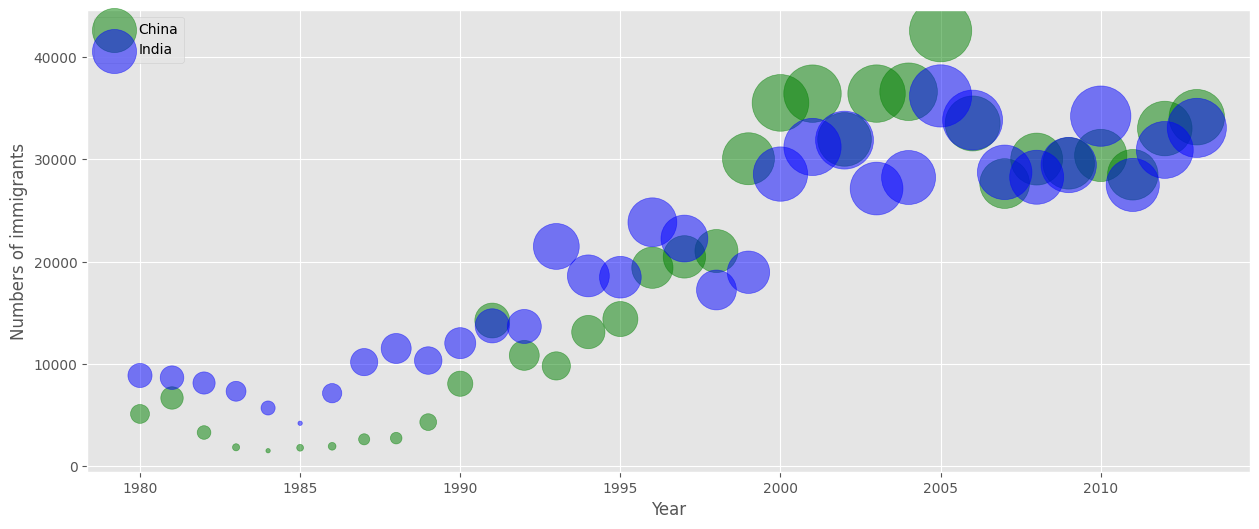

In [ ]:
ax0 = df_can_t.plot(kind = 'scatter',x = 'Year', y = 'China',
                    figsize = (15,6),
                    color = 'green',
                    s= norm_china *2000 + 10,
                    alpha = 0.5
                    )

ax1 = df_can_t.plot(kind = 'scatter',x = 'Year',y = 'India',
                    color = 'blue',
                    figsize = (15,6),
                    s = norm_india * 2000 + 10,
                    alpha = 0.5,
                    ax = ax0)

ax0.legend(['China','India'],loc = 'upper left')
ax0.set_ylabel('Numbers of immigrants')